In [ ]:
!python --version

Python 3.10.12


#Scrapping Data


In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app

import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews
from datetime import datetime, timedelta

app_id = 'com.miHoYo.GenshinImpact'

def get_reviews(app_id, lang='id', count=30000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

def filter_reviews_by_date(reviews, years=1):
    filtered_reviews = []
    one_year_ago = datetime.now() - timedelta(days=365)

    for review in reviews:
        review_date = review['at']
        if review_date >= one_year_ago:
            filtered_reviews.append(review)

    return filtered_reviews

reviews, continuation_token = get_reviews(app_id)
if reviews is not None:
    reviews_last_year = filter_reviews_by_date(reviews)
    print(f"Jumlah ulasan dalam 1 tahun terakhir: {len(reviews_last_year)}")
else:
    print("Tidak ada ulasan yang ditemukan.")

Jumlah ulasan dalam 1 tahun terakhir: 26492


In [ ]:
def check_review_dates(reviews):
    if reviews:
        review_dates = [review['at'] for review in reviews]

        earliest_date = min(review_dates)
        latest_date = max(review_dates)

        print(f"Tanggal ulasan terawal: {earliest_date}")
        print(f"Tanggal ulasan terakhir: {latest_date}")
    else:
        print("Tidak ada ulasan yang ditemukan untuk dicek tanggalnya.")

check_review_dates(reviews_last_year)

Tanggal ulasan terawal: 2023-10-13 11:26:56
Tanggal ulasan terakhir: 2024-10-11 01:18:33


In [ ]:
import csv

def export_csv(reviews, file_name='hasil_scrapping_genshin_impact_last_year.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada ulasan untuk diekspor.")

export_csv(reviews_last_year)

Data berhasil diekspor ke 'hasil_scrapping_genshin_impact_last_year.csv'


#Preprocessing


Tahap preprocessing ini akan terdiri dari setidaknya 6 tahap.
1. Cleaning
2. Case Folding
3. Normalisasi Kata
4. Tokenizing
5. Stopwords removal/filtering
6. Stemming

In [ ]:
import pandas as pd

data = pd.read_csv('hasil_scrapping_genshin_impact_last_year.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26492 entries, 0 to 26491
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    26492 non-null  object
 1   Rating       26492 non-null  int64 
 2   Review Text  26492 non-null  object
 3   Date         26492 non-null  object
dtypes: int64(1), object(3)
memory usage: 828.0+ KB


In [ ]:
data.head(5)

,Review ID,Rating,Review Text,Date
0,15662969-1149-4e48-804c-ced2c29fe29d,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,2024-10-11 01:18:33
1,f684bf57-fc01-42a5-b778-7b596e875124,1,"kesel , gua pen echo nya zhongli aje di persul...",2024-10-09 15:30:02
2,8a4bdf7e-c959-4810-9116-23eef3208de9,1,Game ************.download lama2 GK bisa di je...,2024-10-09 15:10:26
3,de0e1c56-ffe2-4052-8de9-1a4765bb90db,5,Bagi bagi b5 lagi hoyo wkwk,2024-10-09 05:35:46
4,ced47e32-bfe4-4d1b-a0d4-8ac8a1b5a5ee,1,Game bgst rate off mulu ajg,2024-10-09 04:29:55


In [ ]:
df = pd.DataFrame(data[['Date', 'Rating', 'Review Text']])
df.head(5)

,Date,Rating,Review Text
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul..."
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26492 entries, 0 to 26491
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         26492 non-null  object
 1   Rating       26492 non-null  int64 
 2   Review Text  26492 non-null  object
dtypes: int64(1), object(2)
memory usage: 621.0+ KB


In [ ]:
df.drop_duplicates(subset='Review Text', keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21671 entries, 0 to 26491
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21671 non-null  object
 1   Rating       21671 non-null  int64 
 2   Review Text  21671 non-null  object
dtypes: int64(1), object(2)
memory usage: 677.2+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

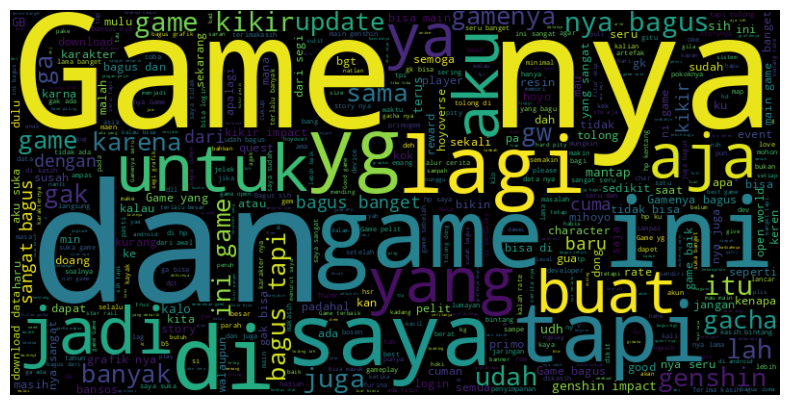

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


df['Review Text'] = df['Review Text'].fillna('')

text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

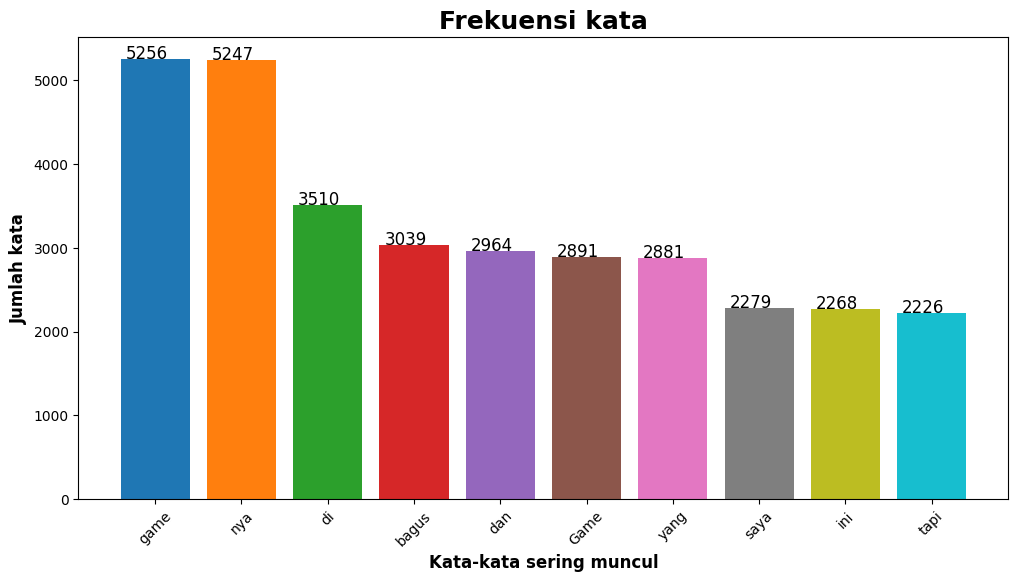

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df['Review Text'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata sering muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar,num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width()/2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

## **Cleaning**

In [ ]:
import re
import string
import nltk

def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
      emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # Emoticons
            u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
            u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
            u"\U0001F1E0-\U0001F1FF"  # Flags
            u"\U00002500-\U00002BEF"  # Chinese characters and symbols
            u"\U00002700-\U000027BF"  # Dingbats
            u"\U000024C2-\U0001F251"  # Enclosed characters
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0000200D"             # Zero Width Joiner
            u"\U00002300-\U000023FF"  # Miscellaneous Technical
            u"\U00002B50"             # Star
            u"\U0001F004"             # Mahjong Tile Red Dragon
            u"\U00002702-\U000027B0"  # Additional Dingbats
            u"\U0001F018-\U0001F270"  # Emoji set
            u"\U0001F650-\U0001F67F"  # Ornamental Dingbats
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "]+", flags=re.UNICODE)
      return emoji_pattern.sub(r'', tweet)
    else:
      return tweet

def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet
  else:
    return tweet

def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
    return tweet
  else:
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(50)


,Date,Rating,Review Text,cleaning
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg
5,2024-10-07 13:37:39,1,game kikir,game kikir
6,2024-10-05 17:56:57,1,"Makin susah yah,harus punya banyak karakter me...",Makin susah yahharus punya banyak karakter mem...
7,2024-10-04 01:37:29,1,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...
8,2024-10-02 03:59:52,1,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang
9,2024-09-30 16:32:22,1,login dipersulit!!!! selalu terlalu banyak per...,login dipersulit selalu terlalu banyak permint...


## **Case Folding**

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)

df.head(5)

,Date,Rating,Review Text,cleaning,case_folding
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg


## **Normalisasi**

In [ ]:
import pandas as pd

def replace_taboo_words(text, kamus_tidak_baku):
  if isinstance(text, str):
    words = text.split()
    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    for word in words:
      if word in kamus_tidak_baku:
        baku_word = kamus_tidak_baku[word]
        if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
          replaced_words.append(baku_word)
          kalimat_baku.append(baku_word)
          kata_diganti.append(word)
          kata_tidak_baku_hash.append(hash(word))
      else:
        replaced_words.append(word)
    replaced_text= ' '.join(replaced_words)
  else:
    replaced_text = ''
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

  return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
data = pd.DataFrame(df[['Date', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)

,Date,Rating,Review Text,cleaning,case_folding
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg


In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['Date', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df.head(50)

,Date,Rating,Review Text,cleaning,case_folding,normalisasi
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg
5,2024-10-07 13:37:39,1,game kikir,game kikir,game kikir,game kikir
6,2024-10-05 17:56:57,1,"Makin susah yah,harus punya banyak karakter me...",Makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...
7,2024-10-04 01:37:29,1,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...
8,2024-10-02 03:59:52,1,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang
9,2024-09-30 16:32:22,1,login dipersulit!!!! selalu terlalu banyak per...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...


## **Tokenization**

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,"[misi, untuk, mendapatkan, jejak, zhongli, ter..."
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...,"[kesel, gua, pengin, echo, ya, zhongli, saja, ..."
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...,"[game, download, lama, tidak, bisa, di, jedang..."
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,"[bagi, bagi, b, lagi, hoyo, wkwk]"
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg,"[game, bgst, rate, off, mulu, ajg]"


## **Stopword Removal/Filtering**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return[word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,"[misi, untuk, mendapatkan, jejak, zhongli, ter...","[misi, jejak, zhongli, susah]"
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...,"[kesel, gua, pengin, echo, ya, zhongli, saja, ...","[kesel, gua, pengin, echo, ya, zhongli, persul..."
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...,"[game, download, lama, tidak, bisa, di, jedang...","[game, download, jedangulang, lag, awalauto, u..."
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,"[bagi, bagi, b, lagi, hoyo, wkwk]","[b, hoyo, wkwk]"
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg,"[game, bgst, rate, off, mulu, ajg]","[game, bgst, rate, off, mulu, ajg]"


## **Stemming**

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.6 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,Date,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,"[misi, untuk, mendapatkan, jejak, zhongli, ter...","[misi, jejak, zhongli, susah]",misi jejak zhongli susah
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...,"[kesel, gua, pengin, echo, ya, zhongli, saja, ...","[kesel, gua, pengin, echo, ya, zhongli, persul...",kesel gua pengin echo ya zhongli sulit ldh ged...
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...,"[game, download, lama, tidak, bisa, di, jedang...","[game, download, jedangulang, lag, awalauto, u...",game download jedangulang lag awalauto unistal
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,"[bagi, bagi, b, lagi, hoyo, wkwk]","[b, hoyo, wkwk]",b hoyo wkwk
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg,"[game, bgst, rate, off, mulu, ajg]","[game, bgst, rate, off, mulu, ajg]",game bgst rate off mulu ajg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21671 entries, 0 to 26491
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              21671 non-null  object
 1   Rating            21671 non-null  int64 
 2   Review Text       21671 non-null  object
 3   cleaning          21671 non-null  object
 4   case_folding      21671 non-null  object
 5   normalisasi       21671 non-null  object
 6   tokenize          21671 non-null  object
 7   stopword removal  21671 non-null  object
 8   stemming          21671 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


In [ ]:
df.to_csv('Hasil_Preprocessing_Genshin.csv', encoding='utf8', index=False)

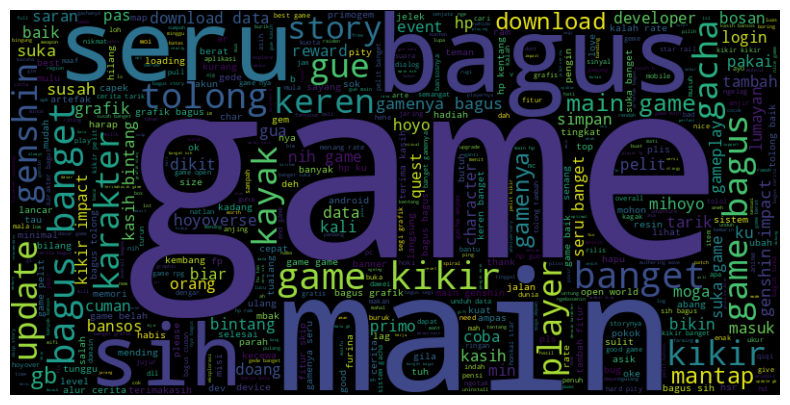

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '....', 'amp', 'ya', 'bagu'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

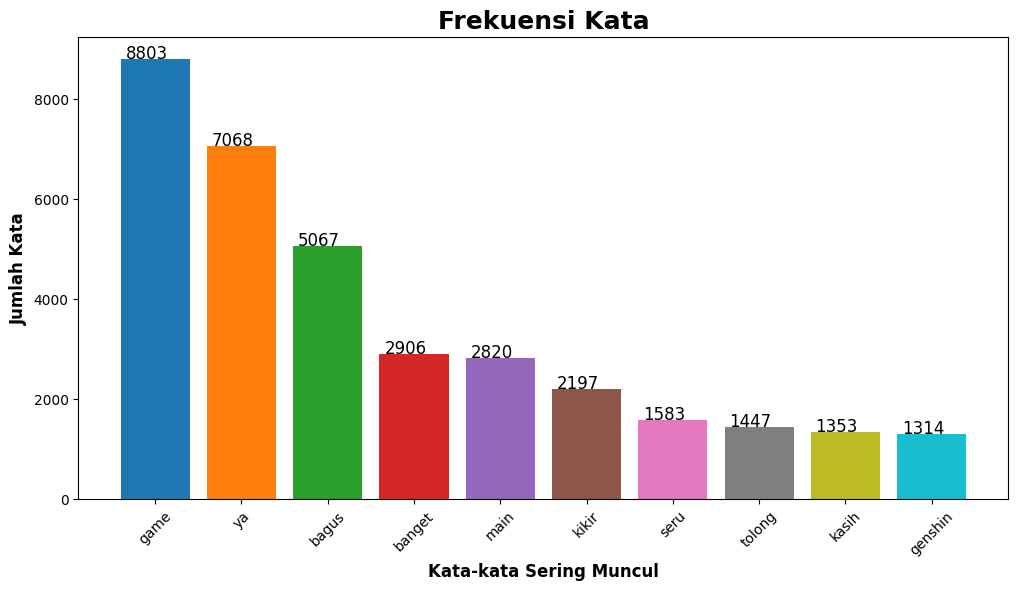

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df['stemming'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width()/2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

#Labeling Data (Lexicon Based)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# data = pd.read_csv("Hasil_Preprocessing_Genshin.csv")
# data.head(5)

ParserError: Error tokenizing data. C error: Expected 9 fields in line 2492, saw 19


In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1277 non-null   object
 1   Rating            1277 non-null   int64 
 2   Review Text       1277 non-null   object
 3   cleaning          1073 non-null   object
 4   case_folding      1073 non-null   object
 5   normalisasi       1053 non-null   object
 6   tokenize          1277 non-null   object
 7   stopword removal  1277 non-null   object
 8   stemming;;        1277 non-null   object
dtypes: int64(1), object(8)
memory usage: 89.9+ KB


In [ ]:
# df = data.dropna()

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21370 entries, 0 to 21670
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              21370 non-null  object
 1   Rating            21370 non-null  int64 
 2   Review Text       21370 non-null  object
 3   cleaning          21370 non-null  object
 4   case_folding      21370 non-null  object
 5   normalisasi       21370 non-null  object
 6   tokenize          21370 non-null  object
 7   stopword removal  21370 non-null  object
 8   stemming          21370 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [ ]:
# def determine_sentiment(text):
#   positive_count = sum(1 for word in text.split() if word in positive_lexicon)
#   negative_count = sum(1 for word in text.split() if word in negative_lexicon)

#   if positive_count > negative_count:
#     return 'Positif'
#   elif positive_count < negative_count:
#     return 'Negatif'

# positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
# negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# # negative_lexicon.add('kikir')

# def replace_none_sentiment(sentiments):
#   replace_flag = "Positif"
#   for i in range(len(sentiments)):
#     if sentiments[i] is None:
#       sentiments[i] = replace_flag
#       replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
#   return sentiments

# df['sentiment'] = df['stemming'].apply(determine_sentiment)
# df['sentiment'] = replace_none_sentiment(df['sentiment'].tolist())

# df.head(10)

<ipython-input-13-3ce71c71f798>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stemming'].apply(determine_sentiment)
<ipython-input-13-3ce71c71f798>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = replace_none_sentiment(df['sentiment'].tolist())


,Date,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,"['misi', 'untuk', 'mendapatkan', 'jejak', 'zho...","['misi', 'jejak', 'zhongli', 'susah']",misi jejak zhongli susah,Negatif
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...,"['kesel', 'gua', 'pengin', 'echo', 'ya', 'zhon...","['kesel', 'gua', 'pengin', 'echo', 'ya', 'zhon...",kesel gua pengin echo ya zhongli sulit ldh ged...,Negatif
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...,"['game', 'download', 'lama', 'tidak', 'bisa', ...","['game', 'download', 'jedangulang', 'lag', 'aw...",game download jedangulang lag awalauto unistal,Positif
3,2024-10-09 05:35:46,5,Bagi bagi b5 lagi hoyo wkwk,Bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,bagi bagi b lagi hoyo wkwk,"['bagi', 'bagi', 'b', 'lagi', 'hoyo', 'wkwk']","['b', 'hoyo', 'wkwk']",b hoyo wkwk,Positif
4,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg,"['game', 'bgst', 'rate', 'off', 'mulu', 'ajg']","['game', 'bgst', 'rate', 'off', 'mulu', 'ajg']",game bgst rate off mulu ajg,Positif
5,2024-10-07 13:37:39,1,game kikir,game kikir,game kikir,game kikir,"['game', 'kikir']","['game', 'kikir']",game kikir,Positif
6,2024-10-05 17:56:57,1,"Makin susah yah,harus punya banyak karakter me...",Makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...,"['makin', 'susah', 'yahharus', 'punya', 'banya...","['susah', 'yahharus', 'karakter', 'game', 'pla...",susah yahharus karakter game play efektif,Positif
7,2024-10-04 01:37:29,1,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...,game kikir story bapuk karakter jelek ndk kaya...,"['game', 'kikir', 'story', 'bapuk', 'karakter'...","['game', 'kikir', 'story', 'bapuk', 'karakter'...",game kikir story bapuk karakter jelek ndk kaya...,Negatif
8,2024-10-02 03:59:52,1,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,"['hype', 'saya', 'pada', 'ini', 'game', 'sudah...","['hype', 'game', 'hilang']",hype game hilang,Positif
9,2024-09-30 16:32:22,1,login dipersulit!!!! selalu terlalu banyak per...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...,"['login', 'dipersulit', 'selalu', 'terlalu', '...","['login', 'dipersulit', 'permintaan', 'coba', ...",login sulit minta coba kasih bintang bintang b...,Negatif


<ipython-input-14-02bdde3b25bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


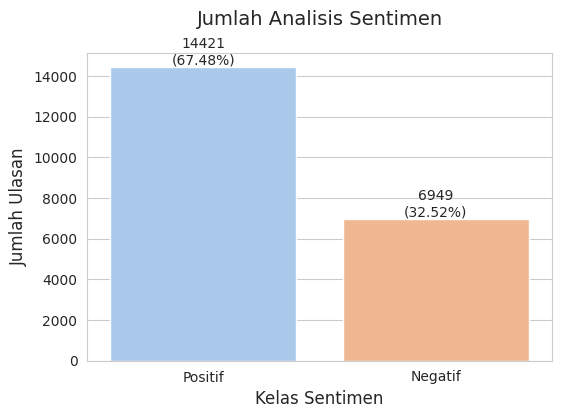

In [ ]:
# sentiment_count = df['sentiment'].value_counts()
# sns.set_style('whitegrid')

# fig, ax = plt.subplots(figsize=(6,4))
# ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
# plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
# plt.xlabel("Kelas Sentimen", fontsize=12)
# plt.ylabel("Jumlah Ulasan", fontsize=12)

# total = len(df['sentiment'])

# for i, count in enumerate(sentiment_count.values):
#   percentage = f'{100 *count/total:.2f}%'
#   ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

# plt.show()

In [ ]:
# df.to_csv('Hasil_Labelling_Genshin_Imbalance.csv', encoding='utf8', index=False)

#Penerapan Metode SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV
import pickle
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

<ipython-input-3-9d001c4ba468>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


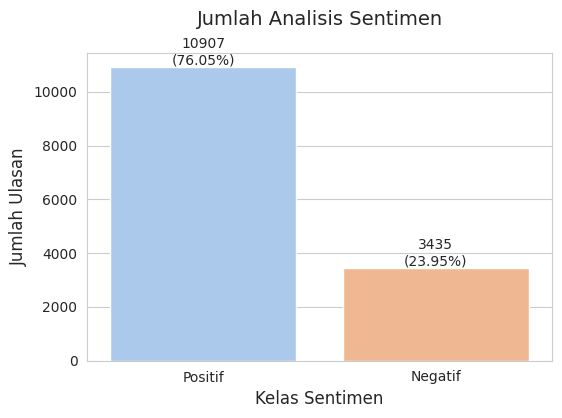

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/Hasil_Labelling_Genshin_Imbalance_nonedropped.csv')

# Get sentiment counts
sentiment_count = df['sentiment'].value_counts()

# Set style
sns.set_style('whitegrid')

# Create plot
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel("Kelas Sentimen", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)

# Calculate and add percentages
total = len(df['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count/total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data = pd.read_csv("Hasil_Labelling_Genshin_Imbalance_nonedropped.csv")
data.head(20)

,Date,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2024-10-11 01:18:33,1,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,Misi untuk mendapatkan jejak ZHONGLI terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,misi untuk mendapatkan jejak zhongli terlalu s...,"['misi', 'untuk', 'mendapatkan', 'jejak', 'zho...","['misi', 'jejak', 'zhongli', 'susah']",misi jejak zhongli susah,Negatif
1,2024-10-09 15:30:02,1,"kesel , gua pen echo nya zhongli aje di persul...",kesel gua pen echo nya zhongli aje di persuli...,kesel gua pen echo nya zhongli aje di persuli...,kesel gua pengin echo ya zhongli saja di persu...,"['kesel', 'gua', 'pengin', 'echo', 'ya', 'zhon...","['kesel', 'gua', 'pengin', 'echo', 'ya', 'zhon...",kesel gua pengin echo ya zhongli sulit ldh ged...,Negatif
2,2024-10-09 15:10:26,1,Game ************.download lama2 GK bisa di je...,Game download lama GK bisa di jedangulang lag ...,game download lama gk bisa di jedangulang lag ...,game download lama tidak bisa di jedangulang l...,"['game', 'download', 'lama', 'tidak', 'bisa', ...","['game', 'download', 'jedangulang', 'lag', 'aw...",game download jedangulang lag awalauto unistal,Positif
3,2024-10-09 04:29:55,1,Game bgst rate off mulu ajg,Game bgst rate off mulu ajg,game bgst rate off mulu ajg,game bgst rate off mulu ajg,"['game', 'bgst', 'rate', 'off', 'mulu', 'ajg']","['game', 'bgst', 'rate', 'off', 'mulu', 'ajg']",game bgst rate off mulu ajg,Positif
4,2024-10-07 13:37:39,1,game kikir,game kikir,game kikir,game kikir,"['game', 'kikir']","['game', 'kikir']",game kikir,Positif
5,2024-10-05 17:56:57,1,"Makin susah yah,harus punya banyak karakter me...",Makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...,makin susah yahharus punya banyak karakter mem...,"['makin', 'susah', 'yahharus', 'punya', 'banya...","['susah', 'yahharus', 'karakter', 'game', 'pla...",susah yahharus karakter game play efektif,Positif
6,2024-10-02 03:59:52,1,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,hype saya pada ini game sudah hilang,"['hype', 'saya', 'pada', 'ini', 'game', 'sudah...","['hype', 'game', 'hilang']",hype game hilang,Positif
7,2024-09-30 16:32:22,1,login dipersulit!!!! selalu terlalu banyak per...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...,login dipersulit selalu terlalu banyak permint...,"['login', 'dipersulit', 'selalu', 'terlalu', '...","['login', 'dipersulit', 'permintaan', 'coba', ...",login sulit minta coba kasih bintang bintang b...,Negatif
8,2024-09-29 15:35:08,1,Ini game sampah dan kikir. Tiap kali gacha sel...,Ini game sampah dan kikir Tiap kali gacha sela...,ini game sampah dan kikir tiap kali gacha sela...,ini game sampah dan kikir tiap kali gacha sela...,"['ini', 'game', 'sampah', 'dan', 'kikir', 'tia...","['game', 'sampah', 'kikir', 'kali', 'gacha', '...",game sampah kikir kali gacha kalah rate off ra...,Negatif
9,2024-09-27 19:29:36,5,Minus game nya control tombol game nya gak bis...,Minus game nya control tombol game nya gak bis...,minus game nya control tombol game nya gak bis...,minus game ya control tombol game ya tidak bis...,"['minus', 'game', 'ya', 'control', 'tombol', '...","['minus', 'game', 'ya', 'control', 'tombol', '...",minus game ya control tombol game ya setting,Positif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14342 entries, 0 to 14341
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              14342 non-null  object
 1   Rating            14342 non-null  int64 
 2   Review Text       14342 non-null  object
 3   cleaning          14342 non-null  object
 4   case_folding      14342 non-null  object
 5   normalisasi       14342 non-null  object
 6   tokenize          14342 non-null  object
 7   stopword removal  14342 non-null  object
 8   stemming          14342 non-null  object
 9   sentiment         14342 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14342 entries, 0 to 14341
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              14342 non-null  object
 1   Rating            14342 non-null  int64 
 2   Review Text       14342 non-null  object
 3   cleaning          14342 non-null  object
 4   case_folding      14342 non-null  object
 5   normalisasi       14342 non-null  object
 6   tokenize          14342 non-null  object
 7   stopword removal  14342 non-null  object
 8   stemming          14342 non-null  object
 9   sentiment         14342 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


**Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['stemming'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.to_frame(), y_train)

In [ ]:
train_set_resampled = pd.DataFrame({'text': X_train_resampled['stemming'], 'sentiment': y_train_resampled})
train_set_resampled.to_csv('train_data_balanced.csv', index=False)

In [ ]:
train_set_original = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set_original.to_csv('train_data_original.csv', index=False)

# Cek jumlah data
print(f'Jumlah data train asli: {len(train_set_original)}')
print(f'Jumlah data train seimbang: {len(train_set_resampled)}')
print(f'Jumlah data test (sama untuk keduanya): {len(test_set)}')

Jumlah data train asli: 11473
Jumlah data train seimbang: 17496
Jumlah data test (sama untuk keduanya): 2869


**TF-IDF Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_resampled_vectorized = vectorizer.transform(X_train_resampled['stemming'])

In [ ]:
print("Ukuran X_train_vectorized:", X_train_vectorized.shape)
print("Ukuran X_test_vectorized:", X_test_vectorized.shape)
print("Ukuran X_train_resampled_vectorized:", X_train_resampled_vectorized.shape)


Ukuran X_train_vectorized: (11473, 10227)
Ukuran X_test_vectorized: (2869, 10227)
Ukuran X_train_resampled_vectorized: (17496, 10227)


In [ ]:
feature_names = vectorizer.get_feature_names_out()

print("hasil transformasi dari data pelatihan:")
print(X_train_vectorized)

print("\nfitur dari vektor TF-IDF:")
print(feature_names)

hasil transformasi dari data pelatihan:
  (0, 9437)	0.3566917884185813
  (0, 7924)	0.8247585343652463
  (0, 9053)	0.4387987329818136
  (1, 9437)	0.12007593774155739
  (1, 3209)	0.13173659527572493
  (1, 722)	0.08105288537027693
  (1, 2545)	0.3190429193572335
  (1, 4619)	0.5301817542769897
  (1, 7238)	0.25718851227209966
  (1, 1311)	0.305644172328712
  (1, 7174)	0.29613761002201433
  (1, 2024)	0.22742168201635676
  (1, 6347)	0.29613761002201433
  (1, 7210)	0.29613761002201433
  (1, 9880)	0.28876374742492145
  (1, 807)	0.14496456478623257
  (2, 7870)	1.0
  (3, 722)	0.4494700892584892
  (3, 1967)	0.4396856629302872
  (3, 6508)	0.5826287777822439
  (3, 4407)	0.5149726827468505
  (4, 4893)	0.2993037152504128
  (4, 9458)	0.28941654361877894
  (4, 9692)	0.27767949651289664
  (4, 6238)	0.2563176277865527
  :	:
  (11468, 4276)	0.3067664091213391
  (11468, 6820)	0.3202143524645685
  (11468, 6678)	0.3202143524645685
  (11469, 3190)	0.18303890099286174
  (11469, 5599)	0.3077639746896278
  (11469, 

In [ ]:
print("hasil transformasi dari data pelatihan:")
print(X_train_resampled_vectorized)

hasil transformasi dari data pelatihan:
  (0, 7924)	0.8247585343652463
  (0, 9053)	0.4387987329818136
  (0, 9437)	0.3566917884185813
  (1, 722)	0.08105288537027693
  (1, 807)	0.14496456478623257
  (1, 1311)	0.305644172328712
  (1, 2024)	0.22742168201635676
  (1, 2545)	0.3190429193572335
  (1, 3209)	0.13173659527572493
  (1, 4619)	0.5301817542769897
  (1, 6347)	0.29613761002201433
  (1, 7174)	0.29613761002201433
  (1, 7210)	0.29613761002201433
  (1, 7238)	0.25718851227209966
  (1, 9437)	0.12007593774155739
  (1, 9880)	0.28876374742492145
  (2, 7870)	1.0
  (3, 722)	0.4494700892584892
  (3, 1967)	0.4396856629302872
  (3, 4407)	0.5149726827468505
  (3, 6508)	0.5826287777822439
  (4, 1534)	0.37443031008581545
  (4, 3190)	0.0883961468086908
  (4, 3654)	0.2104219091850019
  (4, 3781)	0.2899965569973833
  :	:
  (17495, 1285)	0.2119593719388683
  (17495, 2062)	0.19470177004646505
  (17495, 2647)	0.1465790249981784
  (17495, 2773)	0.1465790249981784
  (17495, 3209)	0.1815726397971627
  (17495, 3

In [ ]:
print("Matriks vektorisasi untuk data train:")
print(X_train_vectorized.toarray())

print("\nMatriks vektorisasi untuk data test:")
print(X_test_vectorized.toarray())

Matriks vektorisasi untuk data train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Matriks vektorisasi untuk data test:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# def plot_confusion_matrix(model_name, y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=['Positif', 'Negatif'],
#                 yticklabels=['Positif', 'Negatif'])
#     plt.title(f'{model_name} Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show()

## LINEAR

In [ ]:
# Parameter grid untuk kernel linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Inisialisasi model SVM
svm_linear = SVC()

# Inisialisasi GridSearchCV untuk kernel linear
grid_search_linear = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid_linear,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel Linear...")
grid_search_linear.fit(X_train_vectorized, y_train)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_linear = pd.DataFrame(grid_search_linear.cv_results_)
results_linear = results_linear[['param_C', 'mean_test_score', 'std_test_score']]
results_linear = results_linear.sort_values(by='param_C')

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel Linear:")
print(results_linear)

# Menggunakan model terbaik dari hasil grid search
best_model_linear = grid_search_linear.best_estimator_

y_pred = best_model_linear.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (Linear):", grid_search_linear.best_params_)
print("Akurasi Terbaik (Linear):", grid_search_linear.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (Linear):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (Linear):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (Linear):")
print(confusion_matrix(y_test, y_pred))

Optimasi model SVM dengan kernel Linear...
Hasil Akurasi untuk Setiap Parameter pada Kernel Linear:
   param_C  mean_test_score  std_test_score
0     0.01         0.762486        0.000051
1     0.10         0.907522        0.003889
2     1.00         0.978732        0.001755
3    10.00         0.980214        0.001862
4   100.00         0.980214        0.001800

Parameter Terbaik (Linear): {'C': 10, 'kernel': 'linear'}
Akurasi Terbaik (Linear): 0.9802142939903851

Akurasi pada Dataset Uji (Linear): 0.9829208783548274

Classification Report (Linear):
              precision    recall  f1-score   support

     Negatif       0.97      0.96      0.97       710
     Positif       0.99      0.99      0.99      2159

    accuracy                           0.98      2869
   macro avg       0.98      0.97      0.98      2869
weighted avg       0.98      0.98      0.98      2869


Confusion Matrix (Linear):
[[ 679   31]
 [  18 2141]]


In [ ]:
joblib.dump(best_model_linear, 'revisi_model_linear.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


**Confusion Matrix Linear**

Confusion Matrix with Linear Kernel:


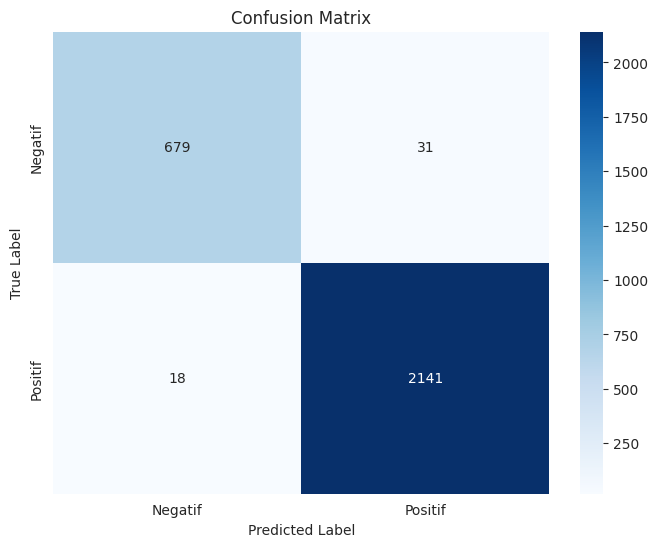

In [ ]:
print("Confusion Matrix with Linear Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##RBF

In [ ]:
# Parameter grid untuk kernel RBF
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Inisialisasi model SVM
svm_rbf = SVC()

# Inisialisasi GridSearchCV untuk kernel RBF
grid_search_rbf = GridSearchCV(
    estimator=svm_rbf,
    param_grid=param_grid_rbf,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel RBF...")
grid_search_rbf.fit(X_train_vectorized, y_train)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_rbf = pd.DataFrame(grid_search_rbf.cv_results_)
results_rbf = results_rbf[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
results_rbf = results_rbf.sort_values(by=['param_C', 'param_gamma'])

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel RBF:")
print(results_rbf)

# Menggunakan model terbaik dari hasil grid search
best_model_rbf = grid_search_rbf.best_estimator_

y_pred = best_model_rbf.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (RBF):", grid_search_rbf.best_params_)
print("Akurasi Terbaik (RBF):", grid_search_rbf.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (RBF):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (RBF):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (RBF):")
print(confusion_matrix(y_test, y_pred))


Optimasi model SVM dengan kernel RBF...
Hasil Akurasi untuk Setiap Parameter pada Kernel RBF:
    param_C  param_gamma  mean_test_score  std_test_score
0      0.01         0.01         0.762486        0.000051
1      0.01         0.10         0.762486        0.000051
2      0.01         1.00         0.762486        0.000051
3      0.01        10.00         0.762486        0.000051
4      0.10         0.01         0.762486        0.000051
5      0.10         0.10         0.762486        0.000051
6      0.10         1.00         0.776344        0.001936
7      0.10        10.00         0.762486        0.000051
8      1.00         0.01         0.762573        0.000149
9      1.00         0.10         0.946483        0.001649
10     1.00         1.00         0.969581        0.001280
11     1.00        10.00         0.770069        0.001458
12    10.00         0.01         0.954240        0.001210
13    10.00         0.10         0.980912        0.001444
14    10.00         1.00         0.9

In [ ]:
joblib.dump(best_model_rbf, 'revisi_model_rbf.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


**Confusion Matrix RBF**

Confusion Matrix with RBF Kernel:


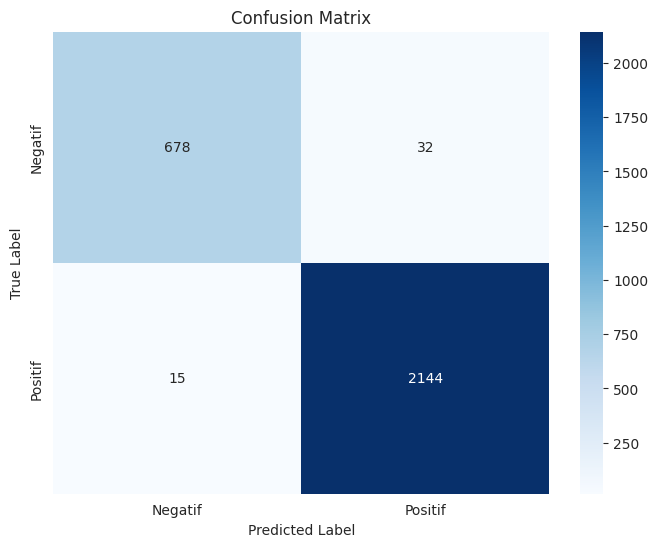

In [ ]:
print("Confusion Matrix with RBF Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##Polynomial

In [ ]:
# Parameter grid untuk kernel polynomial
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Inisialisasi model SVM
svm_poly = SVC()

# Inisialisasi GridSearchCV untuk kernel polynomial
grid_search_poly = GridSearchCV(
    estimator=svm_poly,
    param_grid=param_grid_poly,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel Polynomial...")
grid_search_poly.fit(X_train_vectorized, y_train)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_poly = pd.DataFrame(grid_search_poly.cv_results_)
results_poly = results_poly[['param_C', 'param_gamma', 'param_degree', 'mean_test_score', 'std_test_score']]
results_poly = results_poly.sort_values(by=['param_C', 'param_gamma', 'param_degree'])

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel Polynomial:")
print(results_poly)

# Menggunakan model terbaik dari hasil grid search
best_model_poly = grid_search_poly.best_estimator_

y_pred = best_model_poly.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (Polynomial):", grid_search_poly.best_params_)
print("Akurasi Terbaik (Polynomial):", grid_search_poly.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (Polynomial):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (Polynomial):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (Polynomial):")
print(confusion_matrix(y_test, y_pred))


Optimasi model SVM dengan kernel Polynomial...
Hasil Akurasi untuk Setiap Parameter pada Kernel Polynomial:
    param_C  param_gamma  param_degree  mean_test_score  std_test_score
0      0.01         0.01             2         0.762486        0.000051
4      0.01         0.01             3         0.762486        0.000051
8      0.01         0.01             4         0.762486        0.000051
1      0.01         0.10             2         0.762486        0.000051
5      0.01         0.10             3         0.762486        0.000051
9      0.01         0.10             4         0.762486        0.000051
2      0.01         1.00             2         0.762486        0.000051
6      0.01         1.00             3         0.762486        0.000051
10     0.01         1.00             4         0.762486        0.000051
3      0.01        10.00             2         0.927133        0.003137
7      0.01        10.00             3         0.837532        0.003087
11     0.01        10.00    

In [ ]:
joblib.dump(best_model_poly, 'revisi_model_poly.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


**Confusion Matrix Polynomial**

Confusion Matrix with Polynomial Kernel:


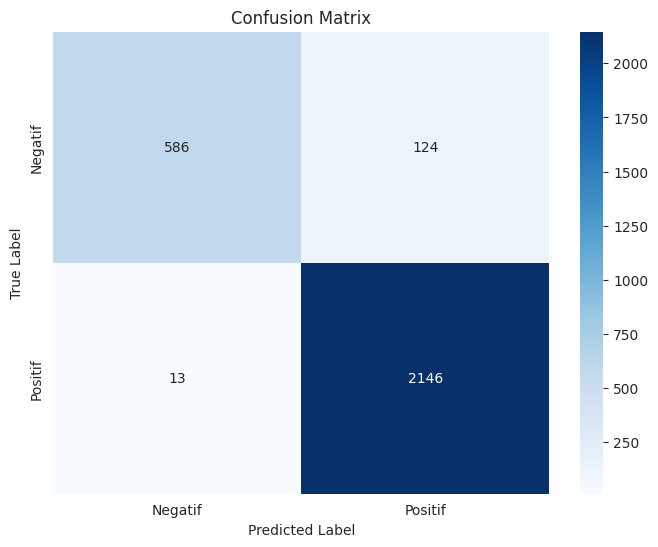

In [ ]:
print("Confusion Matrix with Polynomial Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Perbandingan Antar Kernel

In [ ]:
import numpy as np

In [ ]:
confusion_matrices = {
    "linear": np.array([[975, 442], [330, 2527]]),
    "rbf": np.array([[986, 431], [338, 2519]]),
    "poly": np.array([[872, 545], [313, 2544]])
}

In [ ]:
def calculate_metrics(confusion_matrix):
    TP, FN = confusion_matrix[0]
    FP, TN = confusion_matrix[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

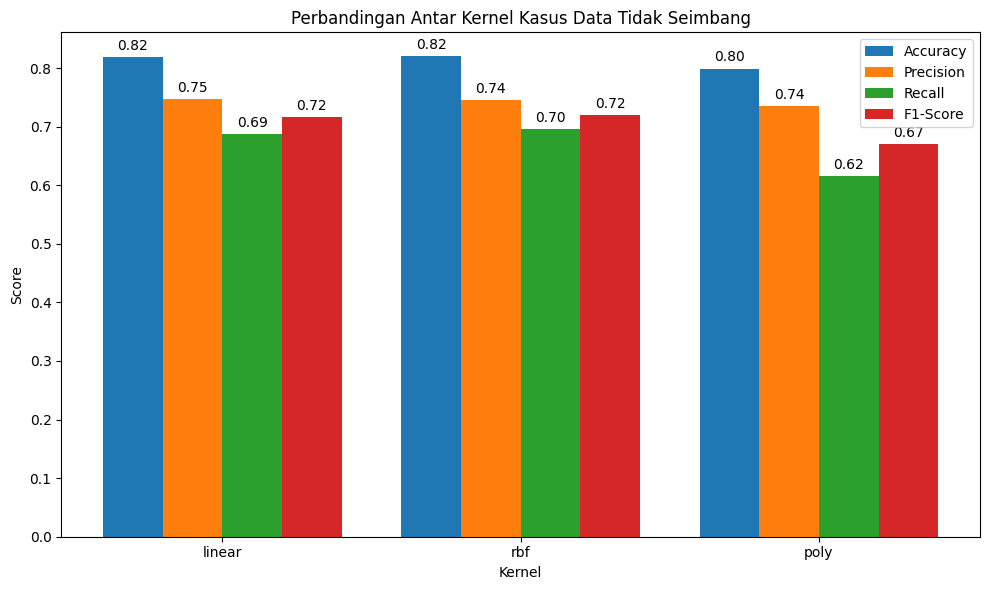

In [ ]:
# Menghitung metrik untuk tiap kernel
metrics = {}
for kernel, matrix in confusion_matrices.items():
    metrics[kernel] = calculate_metrics(matrix)

# Menyusun data untuk plot
kernels = list(metrics.keys())
accuracy = [metrics[kernel][0] for kernel in kernels]
precision = [metrics[kernel][1] for kernel in kernels]
recall = [metrics[kernel][2] for kernel in kernels]
f1_score_values = [metrics[kernel][3] for kernel in kernels]

# Plot perbandingan metrik
x = np.arange(len(kernels))  # lokasi label
width = 0.2  # lebar bar

fig, ax = plt.subplots(figsize=(10, 6))

# Menambahkan bar untuk setiap metrik
bar1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - width/2, precision, width, label='Precision')
bar3 = ax.bar(x + width/2, recall, width, label='Recall')
bar4 = ax.bar(x + width*1.5, f1_score_values, width, label='F1-Score')

# Menambahkan label, judul, dan legenda
ax.set_xlabel('Kernel')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Antar Kernel Kasus Data Tidak Seimbang')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
results_comparison = {
    "Kernel": ["Linear", "RBF", "Polynomial"],
    "Best Accuracy (Train)": [
        grid_search_linear.best_score_,
        grid_search_rbf.best_score_,
        grid_search_poly.best_score_
    ],
    "Best Parameters": [ # Corrected the typo here from 'Best Parameter' to 'Best Parameters'
        grid_search_linear.best_params_,
        grid_search_rbf.best_params_,
        grid_search_poly.best_params_
    ]
}

In [ ]:
results_comparison["Test Accuracy"] = [
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_rbf),
    accuracy_score(y_test, y_pred_poly)
]

# Menampilkan hasil perbandingan dalam bentuk DataFrame
comparison_df = pd.DataFrame(results_comparison)
print("Perbandingan Kinerja Antar Kernel:")
print(comparison_df)

Perbandingan Kinerja Antar Kernel:
       Kernel  Test Accuracy
0      Linear       0.819373
1         RBF       0.820075
2  Polynomial       0.799251


<ipython-input-42-9b27bb73b914>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kernel", y="Test Accuracy", data=comparison_df, palette="viridis")


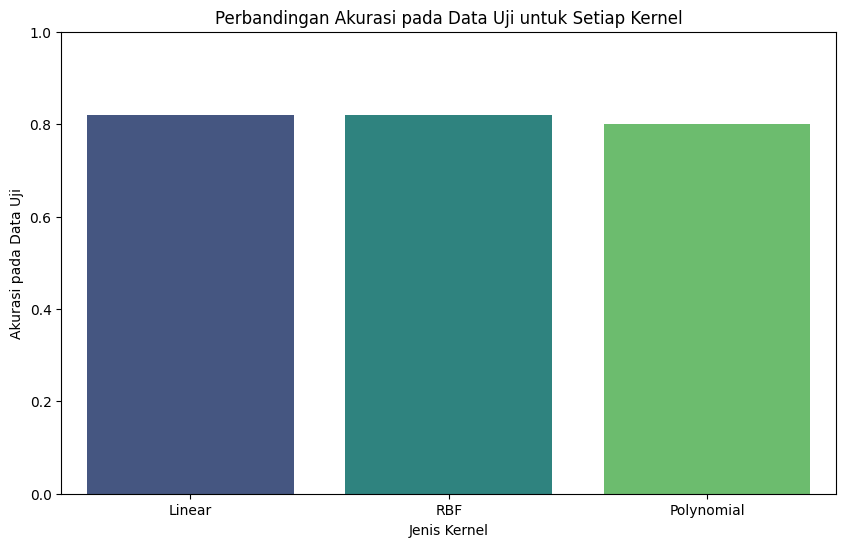

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Kernel", y="Test Accuracy", data=comparison_df, palette="viridis")
plt.title("Perbandingan Akurasi pada Data Uji untuk Setiap Kernel")
plt.xlabel("Jenis Kernel")
plt.ylabel("Akurasi pada Data Uji")
plt.ylim(0, 1)  # Set batas y-axis dari 0 hingga 1
plt.show()

In [ ]:
print("\nParameter Terbaik untuk Masing-masing Kernel:")
for kernel, params in zip(results_comparison["Kernel"], results_comparison["Best Parameters"]):
    print(f"{kernel} Kernel: {params}")


Parameter Terbaik untuk Masing-masing Kernel:
Linear Kernel: {'C': 1, 'kernel': 'linear'}
RBF Kernel: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Polynomial Kernel: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


**Cara Opsional: Load Model**

# New Section

In [ ]:
model_linear = joblib.load('/content/model_linear_imbalance_2.pkl')
model_rbf = joblib.load('/content/model_rbf_imbalance_2.pkl')
model_poly = joblib.load('/content/model_poly_imbalance_2.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Prediksi dengan setiap model
y_pred_linear = model_linear.predict(X_test_vectorized)
y_pred_rbf = model_rbf.predict(X_test_vectorized)
y_pred_poly = model_poly.predict(X_test_vectorized)

# Menghitung akurasi pada data uji
test_accuracy_linear = accuracy_score(y_test, y_pred_linear)
test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
test_accuracy_poly = accuracy_score(y_test, y_pred_poly)


In [ ]:
results_comparison = {
    "Kernel": ["Linear", "RBF", "Polynomial"],
    "Test Accuracy": [test_accuracy_linear, test_accuracy_rbf, test_accuracy_poly]
}

# Membuat dataframe untuk perbandingan hasil
comparison_df = pd.DataFrame(results_comparison)
print("Perbandingan Akurasi Antar Kernel pada Data Uji:")
print(comparison_df)

Perbandingan Akurasi Antar Kernel pada Data Uji:
       Kernel  Test Accuracy
0      Linear       0.819373
1         RBF       0.820075
2  Polynomial       0.799251


In [ ]:
print("\nKernel Linear:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Confusion Matrix dan Classification Report untuk kernel RBF
print("\nKernel RBF:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

# Confusion Matrix dan Classification Report untuk kernel Polynomial
print("\nKernel Polynomial:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))


Kernel Linear:
Confusion Matrix:
 [[ 975  442]
 [ 330 2527]]
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.75      0.69      0.72      1417
     Positif       0.85      0.88      0.87      2857

    accuracy                           0.82      4274
   macro avg       0.80      0.79      0.79      4274
weighted avg       0.82      0.82      0.82      4274


Kernel RBF:
Confusion Matrix:
 [[ 986  431]
 [ 338 2519]]
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.74      0.70      0.72      1417
     Positif       0.85      0.88      0.87      2857

    accuracy                           0.82      4274
   macro avg       0.80      0.79      0.79      4274
weighted avg       0.82      0.82      0.82      4274


Kernel Polynomial:
Confusion Matrix:
 [[ 872  545]
 [ 313 2544]]
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.74      0.6

# BALANCING

In [ ]:
# Parameter grid untuk kernel linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Inisialisasi model SVM
svm_linear = SVC()

# Inisialisasi GridSearchCV untuk kernel linear
grid_search_linear = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid_linear,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel Linear...")
grid_search_linear.fit(X_train_resampled_vectorized, y_train_resampled)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_linear = pd.DataFrame(grid_search_linear.cv_results_)
results_linear = results_linear[['param_C', 'mean_test_score', 'std_test_score']]
results_linear = results_linear.sort_values(by='param_C')

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel Linear:")
print(results_linear)

# Menggunakan model terbaik dari hasil grid search
best_model_linear = grid_search_linear.best_estimator_

y_pred = best_model_linear.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (Linear):", grid_search_linear.best_params_)
print("Akurasi Terbaik (Linear):", grid_search_linear.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (Linear):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (Linear):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (Linear):")
print(confusion_matrix(y_test, y_pred))

Optimasi model SVM dengan kernel Linear...
Hasil Akurasi untuk Setiap Parameter pada Kernel Linear:
   param_C  mean_test_score  std_test_score
0     0.01         0.792124        0.003876
1     0.10         0.952389        0.002144
2     1.00         0.992341        0.001369
3    10.00         0.993827        0.001429
4   100.00         0.993942        0.001332

Parameter Terbaik (Linear): {'C': 100, 'kernel': 'linear'}
Akurasi Terbaik (Linear): 0.9939415996407137

Akurasi pada Dataset Uji (Linear): 0.9832694318577901

Classification Report (Linear):
              precision    recall  f1-score   support

     Negatif       0.97      0.96      0.97       710
     Positif       0.99      0.99      0.99      2159

    accuracy                           0.98      2869
   macro avg       0.98      0.97      0.98      2869
weighted avg       0.98      0.98      0.98      2869


Confusion Matrix (Linear):
[[ 680   30]
 [  18 2141]]


In [ ]:
joblib.dump(best_model_linear, 'revisi_model_linear_balancing.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


Confusion Matrix with Linear Kernel:


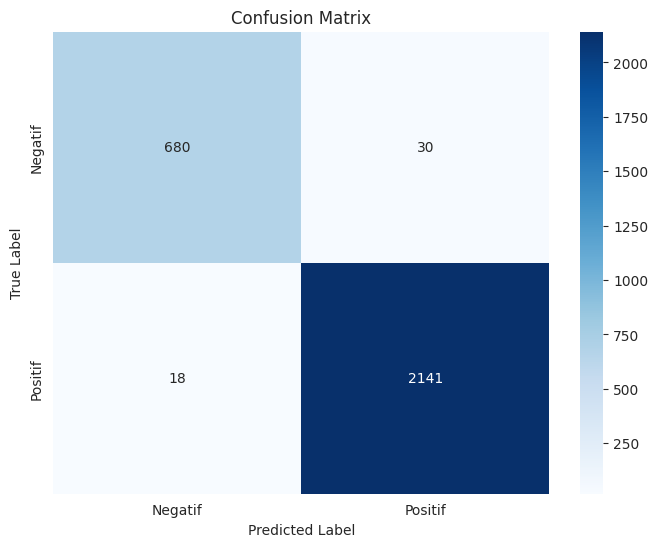

In [ ]:
print("Confusion Matrix with Linear Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Parameter grid untuk kernel RBF
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Inisialisasi model SVM
svm_rbf = SVC()

# Inisialisasi GridSearchCV untuk kernel RBF
grid_search_rbf = GridSearchCV(
    estimator=svm_rbf,
    param_grid=param_grid_rbf,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel RBF...")
grid_search_rbf.fit(X_train_resampled_vectorized, y_train_resampled)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_rbf = pd.DataFrame(grid_search_rbf.cv_results_)
results_rbf = results_rbf[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
results_rbf = results_rbf.sort_values(by=['param_C', 'param_gamma'])

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel RBF:")
print(results_rbf)

# Menggunakan model terbaik dari hasil grid search
best_model_rbf = grid_search_rbf.best_estimator_

y_pred = best_model_rbf.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (RBF):", grid_search_rbf.best_params_)
print("Akurasi Terbaik (RBF):", grid_search_rbf.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (RBF):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (RBF):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (RBF):")
print(confusion_matrix(y_test, y_pred))


Optimasi model SVM dengan kernel RBF...
Hasil Akurasi untuk Setiap Parameter pada Kernel RBF:
    param_C  param_gamma  mean_test_score  std_test_score
0      0.01         0.01         0.512971        0.026229
1      0.01         0.10         0.577904        0.036531
2      0.01         1.00         0.612140        0.003965
3      0.01        10.00         0.503943        0.008171
4      0.10         0.01         0.567158        0.002804
5      0.10         0.10         0.847451        0.002568
6      0.10         1.00         0.913180        0.002933
7      0.10        10.00         0.541152        0.001761
8      1.00         0.01         0.860768        0.002079
9      1.00         0.10         0.969879        0.001672
10     1.00         1.00         0.993484        0.001538
11     1.00        10.00         0.979255        0.025730
12    10.00         0.01         0.971994        0.001647
13    10.00         0.10         0.994113        0.001310
14    10.00         1.00         0.9

In [ ]:
joblib.dump(best_model_rbf, 'revisi_model_rbf_balancing.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


Confusion Matrix with RBF Kernel:


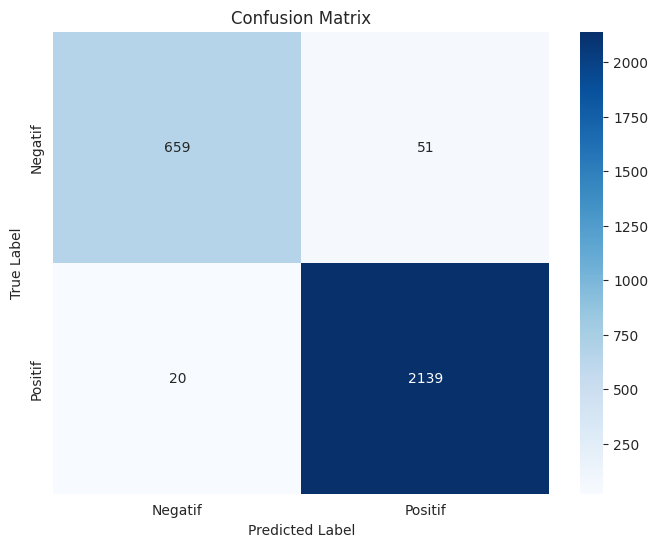

In [ ]:
print("Confusion Matrix with RBF Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Parameter grid untuk kernel polynomial
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Inisialisasi model SVM
svm_poly = SVC()

# Inisialisasi GridSearchCV untuk kernel polynomial
grid_search_poly = GridSearchCV(
    estimator=svm_poly,
    param_grid=param_grid_poly,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)

# Latih model
print("Optimasi model SVM dengan kernel Polynomial...")
grid_search_poly.fit(X_train_resampled_vectorized, y_train_resampled)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Menampilkan hasil akurasi untuk setiap kombinasi parameter
results_poly = pd.DataFrame(grid_search_poly.cv_results_)
results_poly = results_poly[['param_C', 'param_gamma', 'param_degree', 'mean_test_score', 'std_test_score']]
results_poly = results_poly.sort_values(by=['param_C', 'param_gamma', 'param_degree'])

# Menampilkan hasil akurasi untuk setiap parameter yang dicoba
print("Hasil Akurasi untuk Setiap Parameter pada Kernel Polynomial:")
print(results_poly)

# Menggunakan model terbaik dari hasil grid search
best_model_poly = grid_search_poly.best_estimator_

y_pred = best_model_poly.predict(X_test_vectorized)

# Menampilkan parameter terbaik dan skor terbaik saat pelatihan
print("\nParameter Terbaik (Polynomial):", grid_search_poly.best_params_)
print("Akurasi Terbaik (Polynomial):", grid_search_poly.best_score_)

# Menghitung akurasi pada dataset uji
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi pada Dataset Uji (Polynomial):", test_accuracy)

# Menampilkan classification report untuk performa model pada data uji
print("\nClassification Report (Polynomial):")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix untuk analisis lebih lanjut
print("\nConfusion Matrix (Polynomial):")
print(confusion_matrix(y_test, y_pred))


Optimasi model SVM dengan kernel Polynomial...
Hasil Akurasi untuk Setiap Parameter pada Kernel Polynomial:
    param_C  param_gamma  param_degree  mean_test_score  std_test_score
0      0.01         0.01             2         0.507771        0.015829
4      0.01         0.01             3         0.506857        0.014000
8      0.01         0.01             4         0.506114        0.012514
1      0.01         0.10             2         0.507771        0.015829
5      0.01         0.10             3         0.506857        0.014000
9      0.01         0.10             4         0.506114        0.012514
2      0.01         1.00             2         0.561214        0.004443
6      0.01         1.00             3         0.540924        0.007629
10     0.01         1.00             4         0.622890        0.158837
3      0.01        10.00             2         0.991141        0.004778
7      0.01        10.00             3         0.983083        0.016078
11     0.01        10.00    

In [ ]:
joblib.dump(best_model_poly, 'revisi_model_poly_balancing.pkl')
print("Model berhasil disimpan.")

Model berhasil disimpan.


Confusion Matrix with Polynomial Kernel:


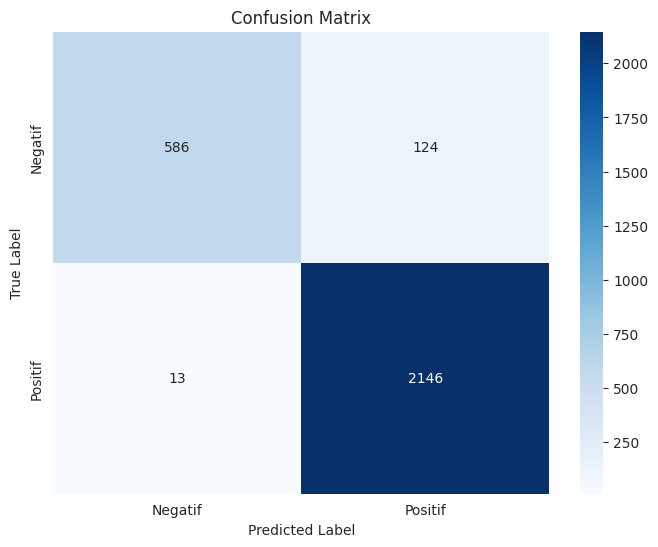

In [ ]:
print("Confusion Matrix with Polynomial Kernel:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
confusion_matrices = {
    "linear": np.array([[679, 31], [13, 2146]]),
    "rbf": np.array([[678, 32], [15, 2144]]),
    "poly": np.array([[586, 124], [13, 2146]])
}

In [ ]:
def calculate_metrics(confusion_matrix):
    TN, FP = confusion_matrix[0]
    FN, TP = confusion_matrix[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

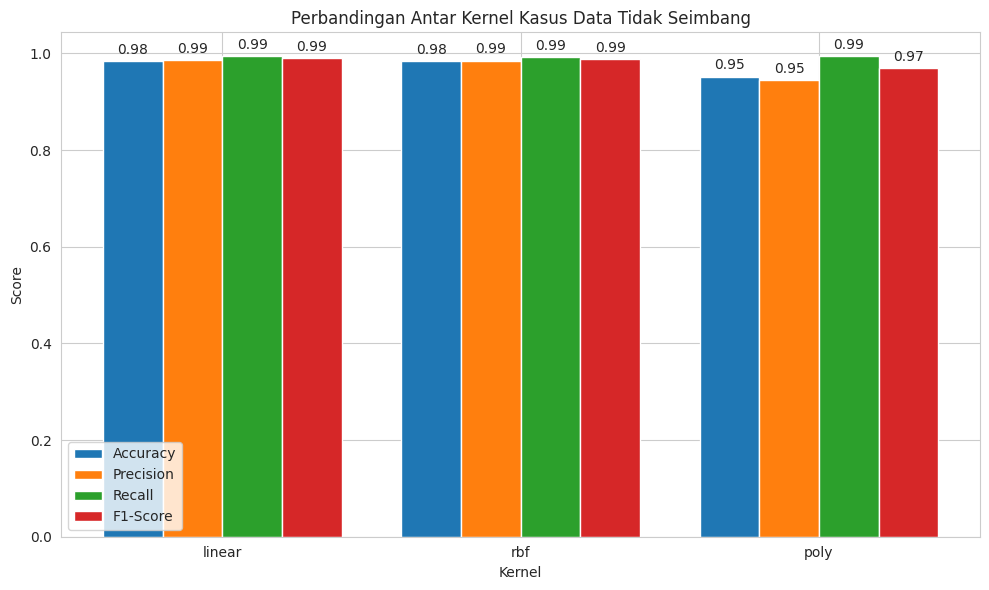

In [ ]:
# Menghitung metrik untuk tiap kernel
metrics = {}
for kernel, matrix in confusion_matrices.items():
    metrics[kernel] = calculate_metrics(matrix)

# Menyusun data untuk plot
kernels = list(metrics.keys())
accuracy = [metrics[kernel][0] for kernel in kernels]
precision = [metrics[kernel][1] for kernel in kernels]
recall = [metrics[kernel][2] for kernel in kernels]
f1_score_values = [metrics[kernel][3] for kernel in kernels]

# Plot perbandingan metrik
x = np.arange(len(kernels))  # lokasi label
width = 0.2  # lebar bar

fig, ax = plt.subplots(figsize=(10, 6))

# Menambahkan bar untuk setiap metrik
bar1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - width/2, precision, width, label='Precision')
bar3 = ax.bar(x + width/2, recall, width, label='Recall')
bar4 = ax.bar(x + width*1.5, f1_score_values, width, label='F1-Score')

# Menambahkan label, judul, dan legenda
ax.set_xlabel('Kernel')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Antar Kernel Kasus Data Seimbang')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
confusion_matrices2 = {
    "linear": np.array([[680, 30], [18, 2141]]),
    "rbf": np.array([[659, 51], [20, 2139]]),
    "poly": np.array([[586, 124], [13, 2146]])
}

In [ ]:
def calculate_metrics2(confusion_matrix):
    TN, FP = confusion_matrix[0]
    FN, TP = confusion_matrix[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

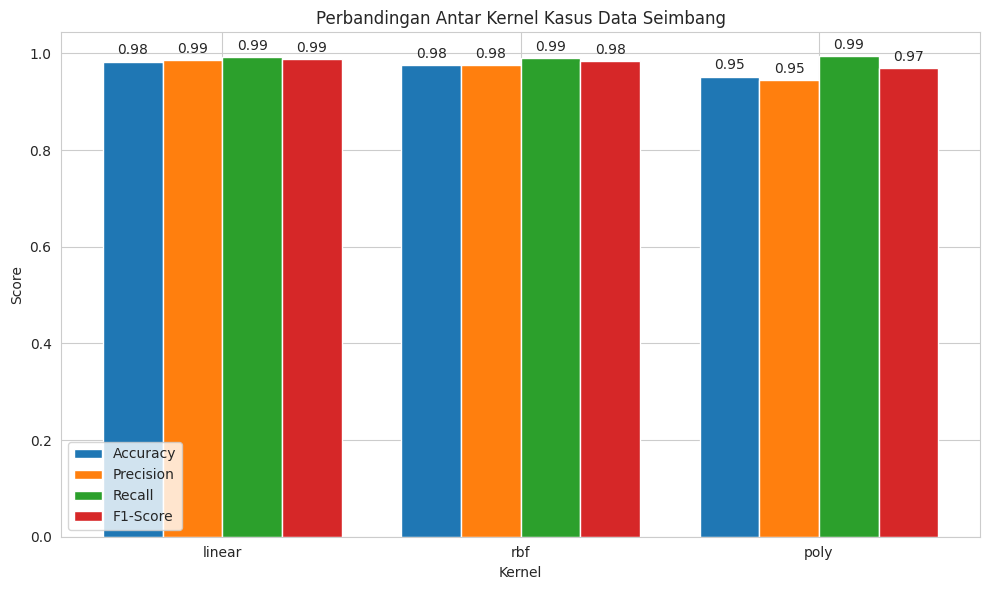

In [ ]:
# Menghitung metrik untuk tiap kernel
metrics = {}
for kernel, matrix in confusion_matrices2.items():
    metrics[kernel] = calculate_metrics2(matrix)

# Menyusun data untuk plot
kernels = list(metrics.keys())
accuracy = [metrics[kernel][0] for kernel in kernels]
precision = [metrics[kernel][1] for kernel in kernels]
recall = [metrics[kernel][2] for kernel in kernels]
f1_score_values = [metrics[kernel][3] for kernel in kernels]

# Plot perbandingan metrik
x = np.arange(len(kernels))  # lokasi label
width = 0.2  # lebar bar

fig, ax = plt.subplots(figsize=(10, 6))

# Menambahkan bar untuk setiap metrik
bar1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - width/2, precision, width, label='Precision')
bar3 = ax.bar(x + width/2, recall, width, label='Recall')
bar4 = ax.bar(x + width*1.5, f1_score_values, width, label='F1-Score')

# Menambahkan label, judul, dan legenda
ax.set_xlabel('Kernel')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Antar Kernel Kasus Data Seimbang')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


Explained variance ratio: [0.02320545 0.0311488 ]


TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

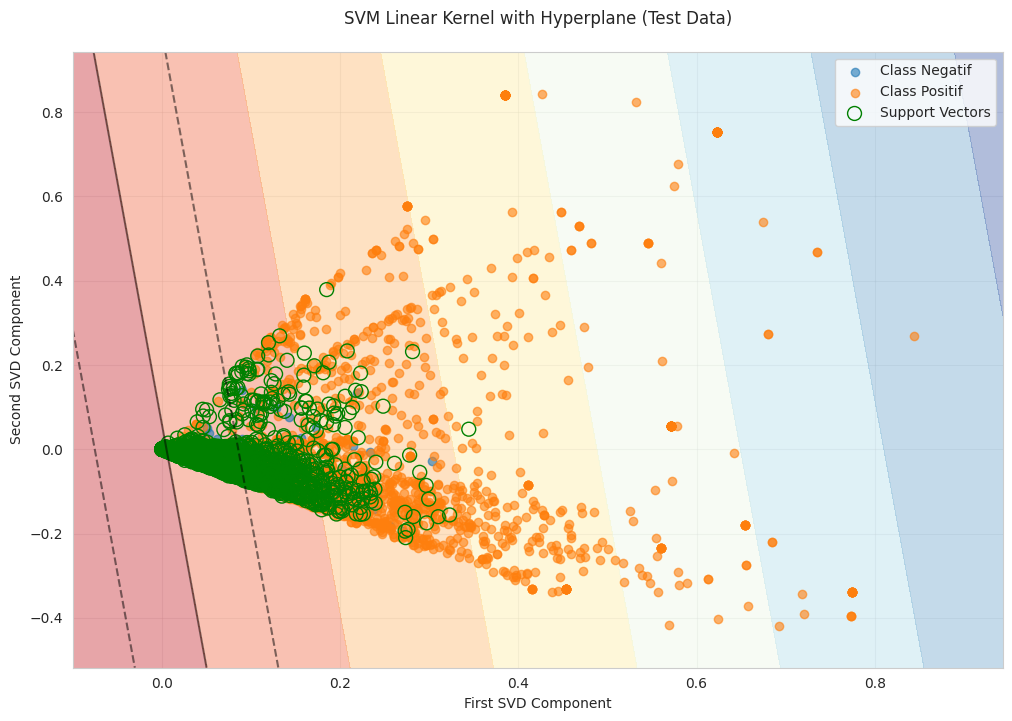

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

def visualize_svm_with_hyperplane(model, X, y, title="SVM Decision Boundary"):
    # Konversi label ke numerik
    le = LabelEncoder()
    y_numeric = le.fit_transform(y)

    # Gunakan TruncatedSVD untuk reduksi dimensi
    svd = TruncatedSVD(n_components=2, random_state=42)
    X_2d = svd.fit_transform(X)

    # Buat grid untuk plotting decision boundary
    x_min, x_max = X_2d[:, 0].min() - 0.1, X_2d[:, 0].max() + 0.1
    y_min, y_max = X_2d[:, 1].min() - 0.1, X_2d[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Transform grid points back to original space
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_original = svd.inverse_transform(grid_points)

    # Get decision function values
    Z = model.decision_function(grid_original)
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot decision boundary dan margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot filled contours
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot training points dengan warna berdasarkan kelas
    for i, label in enumerate(le.classes_):
        mask = y == label
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
                   label=f'Class {label}',
                   alpha=0.6)

    # Plot support vectors
    if hasattr(model, 'support_vectors_'):
        sv = svd.transform(model.support_vectors_)
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1,
                   facecolors='none', edgecolors='green',
                   label='Support Vectors')

    plt.title(title, fontsize=12, pad=20)
    plt.xlabel('First SVD Component')
    plt.ylabel('Second SVD Component')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Print additional information
    print(f"\nExplained variance ratio: {svd.explained_variance_ratio_}")
    print(f"Number of support vectors: {len(model.support_vectors_)}")

    plt.show()

# Visualisasi model
visualize_svm_with_hyperplane(
    best_model_linear,
    X_test_vectorized,
    y_test,
    "SVM Linear Kernel with Hyperplane (Test Data)"
)